In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [3]:
np.random.seed(1)
sample_1 = np.random.choice(fish_5, size=3, replace=False)

sample_1

array([4, 3, 6])

In [4]:
round(np.mean(sample_1), 3)

4.333

In [5]:
fish_100000 = pd.read_csv('5-2-1-fish_length_100000.csv')['length']
fish_100000.head(3)

0    5.297442
1    3.505566
2    3.572546
Name: length, dtype: float64

In [6]:
len(fish_100000)

100000

In [7]:
np.random.seed(2)

sample_2 = np.random.choice(fish_100000, size=500, replace=False)

In [8]:
round(np.mean(sample_2), 3)

3.962

<AxesSubplot:ylabel='Count'>

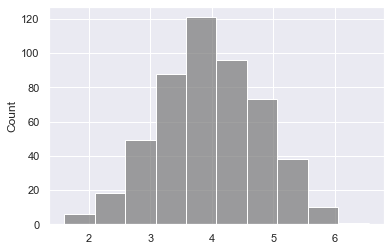

In [9]:
sns.histplot(sample_2, color='gray', bins=10)

In [10]:
print('平均:', round(np.mean(fish_100000), 3))
print('分散:', round(np.var(fish_100000, ddof=0), 3))
print('標準偏差:', round(np.std(fish_100000, ddof=0), 3))

平均: 4.0
分散: 0.64
標準偏差: 0.8


<AxesSubplot:xlabel='length', ylabel='Count'>

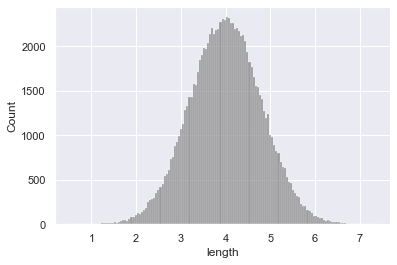

In [11]:
sns.histplot(fish_100000, color='gray')

In [12]:
x = np.arange(0, 8.1, 0.1)

density = stats.norm.pdf(x=x, loc=4, scale=0.8)

density_df = pd.DataFrame({
    'x': x,
    'density': density
})

density_df.head(3)

,x,density
0,0.0,0.000002
1,0.1,0.000003
2,0.2,0.000006


<AxesSubplot:xlabel='length', ylabel='Density'>

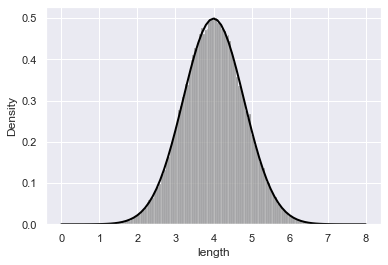

In [13]:
sns.histplot(fish_100000, stat='density', color='gray')

sns.lineplot(x=x, y=density, data=density_df, color='black', linewidth=2.0)

In [14]:
np.random.seed(1)

sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sampling_norm

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [15]:
round(np.mean(sampling_norm), 3)

3.922

In [16]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
population = stats.norm(loc=4, scale=0.8)

In [18]:
np.random.seed(2)
sample = population.rvs(size=10)
sample

array([3.66659372, 3.95498654, 2.29104312, 5.31221665, 2.56525153,
       3.32660211, 4.40230513, 3.00376953, 3.15363822, 3.27279391])

In [19]:
round(np.mean(sample), 3)

3.495

In [20]:
sample_mean_array = np.zeros(10000)

In [21]:
np.random.seed(1)
for i in range(0, 10000):
    sample_loop = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample_loop)

In [22]:
sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

In [23]:
round(np.mean(sample_mean_array), 3)

4.004

In [24]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample_loop = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample_loop)
    return sample_mean_array

In [25]:
np.random.seed(1)
round(np.mean(calc_sample_mean(size=10, n_trial=10000)), 3)

4.004

In [26]:
np.random.seed(1)
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    'sample_mean': size_10,
    'sample_size': np.tile('size 10', 10000)
})

size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    'sample_mean': size_20,
    'sample_size': np.tile('size 20', 10000)
})

size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    'sample_mean': size_30,
    'sample_size': np.tile('size 30', 10000)
})

sim_result = pd.concat([size_10_df, size_20_df, size_30_df])

sim_result.head(3)

,sample_mean,sample_size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10


In [27]:
len(sim_result)

30000

<AxesSubplot:xlabel='sample_size', ylabel='sample_mean'>

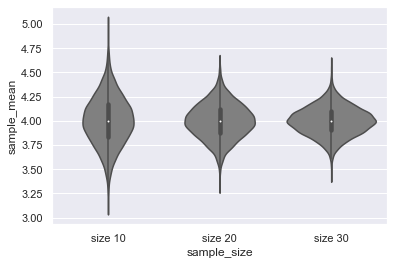

In [28]:
sns.violinplot(x='sample_size', y='sample_mean', data=sim_result, color='gray')

In [29]:
group = sim_result.groupby('sample_size')
print(group.agg([np.std, np.mean], ddof=1).round(3))

            sample_mean       
                    std   mean
sample_size                   
size 10           0.251  4.004
size 20           0.180  4.001
size 30           0.146  4.001


In [30]:
print('size 10:', round(0.8 / np.sqrt(10), 3))
print('size 20:', round(0.8 / np.sqrt(20), 3))
print('size 30:', round(0.8 / np.sqrt(30), 3))

size 10: 0.253
size 20: 0.179
size 30: 0.146


In [31]:
size_array = np.arange(10, 100100, 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [32]:
sample_mean_array_size = np.zeros(len(size_array))

In [33]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_loop = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample_loop)

In [34]:
size_mean_df = pd.DataFrame({
    'sample_size': size_array,
    'sample_mean': sample_mean_array_size
})

size_mean_df.head(3)

,sample_size,sample_mean
0,10,3.922287
1,110,4.038361
2,210,4.091853


<AxesSubplot:xlabel='sample_size', ylabel='sample_mean'>

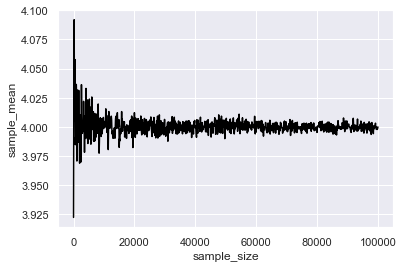

In [35]:
sns.lineplot(x='sample_size', y='sample_mean', data=size_mean_df, color='black')

In [36]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
population = stats.norm(loc=4, scale=0.8)

In [38]:
np.random.seed(2)
sample = population.rvs(size=10)
sample

array([3.66659372, 3.95498654, 2.29104312, 5.31221665, 2.56525153,
       3.32660211, 4.40230513, 3.00376953, 3.15363822, 3.27279391])

In [39]:
print('標本分散', round(np.var(sample, ddof=0), 3))
print('不偏分散', round(np.var(sample, ddof=1), 3))

標本分散 0.712
不偏分散 0.791


In [40]:
sample_var_array = np.zeros(10000)

In [41]:
np.random.seed(1)
for i in range(0, 10000):
    sample_loop = population.rvs(size=10)
    sample_var_array[i] = np.var(sample_loop, ddof=0)

In [42]:
round(np.mean(sample_var_array), 3)

0.575

In [43]:
unbias_var_array = np.zeros(10000)

np.random.seed(1)
for i in range(0, 10000):
    sample_loop = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample_loop, ddof=1)
    
round(np.mean(unbias_var_array), 3)

0.639

In [44]:
size_array = np.arange(10, 100100, 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [45]:
unbias_var_array_size = np.zeros(len(size_array))

In [46]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_loop = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample_loop, ddof=1)

In [47]:
size_var_df = pd.DataFrame({
    'sample_size': size_array,
    'unbias_var': unbias_var_array_size
})

size_var_df.head(3)

,sample_size,unbias_var
0,10,1.008526
1,110,0.460805
2,210,0.631723


<AxesSubplot:xlabel='sample_size', ylabel='unbias_var'>

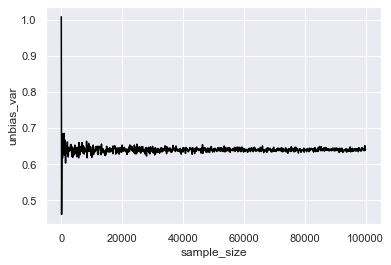

In [48]:
sns.lineplot(x='sample_size', y='unbias_var', data=size_var_df, color='black')

In [49]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [50]:
mu = 4
sigma = 0.8
population = stats.norm(loc=mu, scale=sigma)

In [51]:
n = 5

np.random.seed(1)
sample = population.rvs(size=n)
sample

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ])

In [52]:
round(stats.chi2.pdf(x=2, df=n - 1), 3)

0.184

In [53]:
round(stats.chi2.cdf(x=2, df=n - 1), 3)

0.264

In [54]:
round(stats.chi2.ppf(q=0.5, df=n - 1), 3)

3.357

In [55]:
n = 5

np.random.seed(1)

chi2_value_array = np.zeros(10000)
for i in range(0, 10000):
    sample = population.rvs(size=n)
    u2 = np.var(sample, ddof=1)
    chi2 = (n - 1) * u2 / sigma**2
    chi2_value_array[i] = chi2

In [56]:
x = np.arange(0, 20.1, 0.1)

chi2_distribution = stats.chi2.pdf(x=x, df=n - 1)
chi2_df = pd.DataFrame({
    'x': x,
    'chi2_distribution': chi2_distribution
})

chi2_df.head()

,x,chi2_distribution
0,0.0,0.000000
1,0.1,0.023781
2,0.2,0.045242
3,0.3,0.064553
4,0.4,0.081873


<AxesSubplot:xlabel='x', ylabel='Density'>

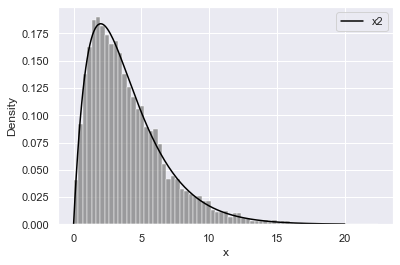

In [57]:
sns.histplot(chi2_value_array, color='gray', stat='density')

sns.lineplot(x='x', y='chi2_distribution', data=chi2_df, color='black', label='x2')

In [58]:
n = 3

np.random.seed(1)

z_value_array = np.zeros(10000)
for i in range(0, 10000):
    sample = population.rvs(size=n)
    x_bar = np.mean(sample)
    bar_sigma = sigma / np.sqrt(n)
    z_value_array[i] = (x_bar - mu) / bar_sigma

In [59]:
x = np.arange(-6, 6.1, 0.1)

z_distribution = stats.norm.pdf(x=x, loc=0, scale=1)

z_df = pd.DataFrame({
    'x': x,
    'z_distribution': z_distribution
})

z_df.head()

,x,z_distribution
0,-6.0,6.075883e-09
1,-5.9,1.101576e-08
2,-5.8,1.977320e-08
3,-5.7,3.513955e-08
4,-5.6,6.182621e-08


(-6.0, 6.0)

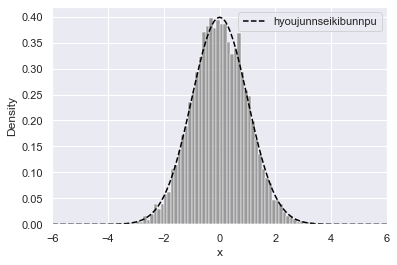

In [60]:
sns.histplot(z_value_array, color='gray', stat='density')

sns.lineplot(x='x', y='z_distribution', data=z_df, color='black', linestyle='dashed', label='hyoujunnseikibunnpu')

plt.xlim(-6, 6)

In [61]:
np.random.seed(1)

t_value_array = np.zeros(10000)
for i in range(0, 10000):
    sample = population.rvs(size=n)
    x_bar = np.mean(sample)
    u = np.std(sample, ddof=1)
    se = u / np.sqrt(n)
    t_value_array[i] = (x_bar - mu) / se

In [62]:
t_distribution = stats.t.pdf(x=x, df=n - 1)

t_df = pd.DataFrame({
    'x': x,
    't_distribution': t_distribution
})

t_df.head()

,x,t_distribution
0,-6.0,0.004269
1,-5.9,0.004478
2,-5.8,0.004700
3,-5.7,0.004937
4,-5.6,0.005190


(-6.0, 6.0)

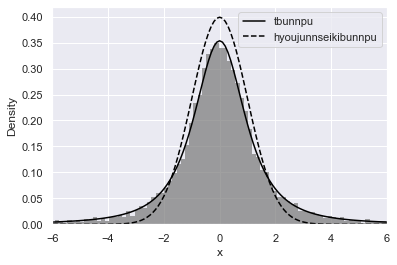

In [63]:
sns.histplot(t_value_array, color='gray', stat='density')

sns.lineplot(x='x', y='t_distribution', data=t_df, color='black', label='tbunnpu')

sns.lineplot(x='x', y='z_distribution', data=z_df, color='black', linestyle='dashed', label='hyoujunnseikibunnpu')

plt.xlim(-6, 6)

In [64]:
m = 5
n = 10

np.random.seed(1)

f_value_array = np.zeros(10000)
for i in range(0, 10000):
    sample_x = population.rvs(size=m)
    sample_y = population.rvs(size=n)
    u2_x = np.var(sample_x, ddof=1)
    u2_y = np.var(sample_y, ddof=1)
    f_value_array[i] = u2_x / u2_y

In [65]:
x = np.arange(0, 6.1, 0.1)

f_distribution = stats.f.pdf(x=x, dfn=m - 1, dfd=n - 1)

f_df = pd.DataFrame({
    'x': x,
    'f_distribution': f_distribution
})

f_df.head()

,x,f_distribution
0,0.0,0.000000
1,0.1,0.368515
2,0.2,0.562143
3,0.3,0.650140
4,0.4,0.675085


(0.0, 6.0)

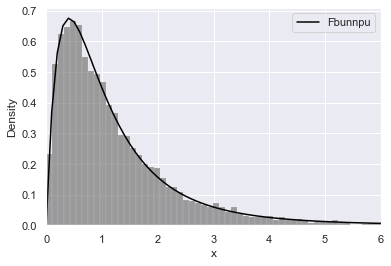

In [66]:
sns.histplot(f_value_array, color='gray', stat='density')

sns.lineplot(x='x', y='f_distribution', data=f_df, color='black', label='Fbunnpu')

plt.xlim(0, 6)

In [67]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [68]:
fish = pd.read_csv('5-6-1-fish_length.csv')['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [69]:
x_bar = np.mean(fish)
u2 = np.var(fish, ddof=1)

print('標本平均:', round(x_bar, 3))
print('不偏分散:', round(u2, 3))

標本平均: 4.187
不偏分散: 0.68


In [70]:
n = len(fish)
df = n - 1
u = np.std(fish, ddof=1)
se = u / np.sqrt(n)

print('サンプルサイズ:', n)
print('自由度:', df)
print('標準偏差:', round(u, 3))
print('標準誤差:', round(se, 3))
print('標本平均:', round(x_bar, 3))

サンプルサイズ: 10
自由度: 9
標準偏差: 0.825
標準誤差: 0.261
標本平均: 4.187


In [71]:
t_025 = stats.t.ppf(q=0.025, df=df)
t_975 = stats.t.ppf(q=0.975, df=df)

print('t分布の2.5％点：', round(t_025, 3))
print('t分布の97.5％点：', round(t_975, 3))

t分布の2.5％点： -2.262
t分布の97.5％点： 2.262


In [72]:
lower_mu = x_bar - t_975 * se
upper_mu = x_bar - t_025 * se

print('下側信頼限界:', round(lower_mu, 3))
print('上側信頼限界：', round(upper_mu, 3))

下側信頼限界: 3.597
上側信頼限界： 4.777


In [73]:
res_1 = stats.t.interval(alpha=0.95, df=df, loc=x_bar, scale=se)
np.round(res_1, 3)

array([3.597, 4.777])

In [74]:
se_2 = (u * 10) / np.sqrt(n)
res_2 = stats.t.interval(alpha=0.95, df=df, loc=x_bar, scale=se_2)
np.round(res_2, 3)

array([-1.713, 10.087])

In [75]:
n_2 = n * 10
df_2 = n_2 - 1
se_3 = u / np.sqrt(n_2)
res_3 = stats.t.interval(alpha=0.95, df=df_2, loc=x_bar, scale=se_3)
np.round(res_3, 3)

array([4.023, 4.351])

In [76]:
res_4 = stats.t.interval(alpha=0.99, df=df, loc=x_bar, scale=se)
np.round(res_4, 3)

array([3.339, 5.035])

In [77]:
norm_dist = stats.norm(loc=4, scale=0.8)

In [78]:
num_trials = 20000
include_num = 0

In [79]:
np.random.seed(1)
for i in range(0, num_trials):
    sample = norm_dist.rvs(size=n)
    df = n - 1
    x_bar = np.mean(sample)
    u = np.std(sample, ddof=1)
    se = u / np.sqrt(n)
    interval = stats.t.interval(0.95, df, x_bar, se)
    if (interval[0] <= 4 <= interval[1]):
        include_num = include_num + 1

In [80]:
include_num / num_trials

0.948

In [82]:
chi2_025 = stats.chi2.ppf(q=0.025, df=df)
chi2_975 = stats.chi2.ppf(q=0.975, df=df)

print('x2分布の2.5%点：', round(chi2_025, 3))
print('x2分布の97.5%点：', round(chi2_975, 3))

x2分布の2.5%点： 2.7
x2分布の97.5%点： 19.023


In [83]:
upper_sigma = (n - 1) * u2 / chi2_025
lower_sigma = (n - 1) * u2 / chi2_975

print(round(lower_sigma, 3))
print(round(upper_sigma, 3))

0.322
2.267
